<a href="https://colab.research.google.com/github/poojaa-29/FMML_Projects_and_Labs_2025/blob/main/AIML_Module_4_Lab_2_Introduction_to_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Training Program on AIML**
# Module 4: Perceptron and Gradient Descent
## Lab 2: Introduction to Gradient Descent

Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.

A brief overview of the algorithm is


*   start with a random initialization of the solution.
*   incrementally change the solution by moving in the direction of negative gradient of the objective function.
*   repeat the previous step until some convergence criteria is met.

The key equation for change in weight is:
$$w^{k+1} \leftarrow w^k - \eta \Delta J$$



In [1]:
# Importing the required libraries

import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(42)
np.random.seed(42)

We can start be choosing coefficients for a second degree polynomial equation $(a x^2 + bx + c)$ that will distribute the data we will try to model.

Let's define some random x data (inputs) we hope to predict y (outputs) of.

In [18]:
def eval_polynomial(coeffs, x):
    """
    Function to return the output of evaluating a polynomial,
    given a specific x value and coefficients.

    Args:
        coeffs: List containing the coefficients for the polynomial (e.g., [a, b, c] for ax^2 + bx + c).
        x: The input x value to the polynomial.

    Returns:
        y: The corresponding output y value for the polynomial.

    """
    y = 0
    for i, coeff in enumerate(reversed(coeffs)):
        y += coeff * (x ** i)
    return y

hundred_xs = np.random.uniform(-10, 10, 100)
# Example: coefficients for a cubic polynomial (ax^3 + bx^2 + cx + d)
coeffs = [2, -3, 1, 5]

xs = []
ys = []
for x in hundred_xs:
    y  = eval_polynomial(coeffs, x)
    xs.append(x)
    ys.append(y)

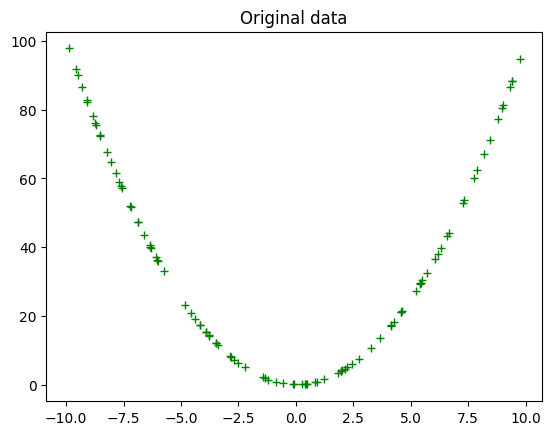

In [3]:
plt.plot(xs, ys, 'g+')
plt.title('Original data')
plt.show()

This is good, but we could improve on this by making things more realistic. You can add noise or **jitter** to the values so they can resemble real-world data.


In [19]:
def eval_polynomial_jitter(coeffs, x, j):
    """
    Function to return the noisy output of evaluating a polynomial,
    given a specific x value. Output values can be within [y − j, y + j].

    Args:
        coeffs: List containing the coefficients for the polynomial.
        x: The input x value to the polynomial.
        j: Jitter parameter, to introduce noise to output y.

    Returns:
        y: The corresponding jittered output y value for the polynomial.

    """
    y = 0
    for i, coeff in enumerate(reversed(coeffs)):
        y += coeff * (x ** i)

    interval = [y - j, y + j]
    interval_min = interval[0]
    interval_max = interval[1]
    jit_val = random.random() * interval_max      # Generate a random number in range 0 to interval max

    while interval_min > jit_val:                 # While the random jitter value is less than the interval min,
        jit_val = random.random() * interval_max  # it is not in the right range. Re-roll the generator until it
                                                  # give a number greater than the interval min.

    return jit_val

xs = []
ys = []
for x in hundred_xs:
    y  = eval_polynomial_jitter(coeffs, x, 10) # Increased jitter for a cubic polynomial
    xs.append(x)
    ys.append(y)

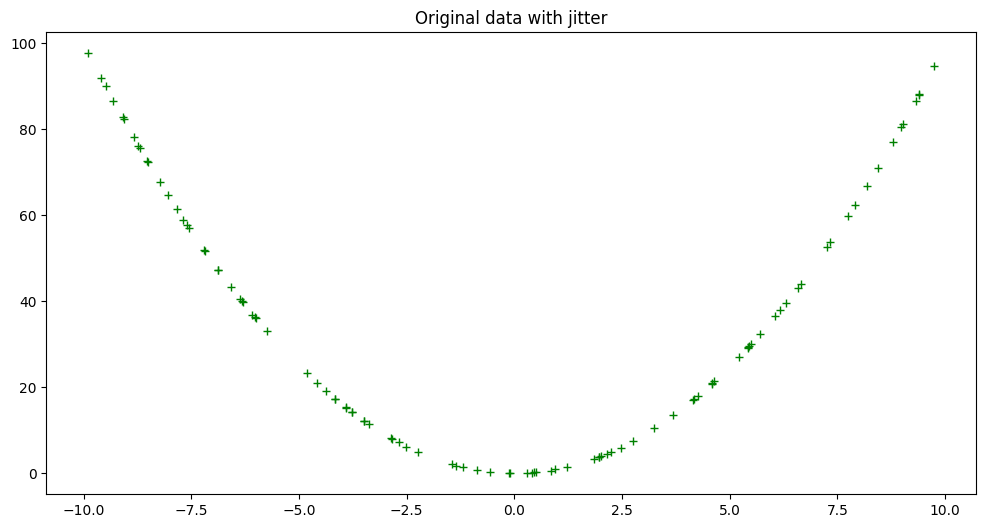

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+')
plt.title('Original data with jitter')
plt.show()

We will now build our predictive model, and optimize it with gradient descent and we will try to get as close to these values as possible.

To get a quantifiable measure of how incorrect it is, we calculate the Mean Squared Error loss for the model. This is the mean value of the sum of the squared differences between the actual and predicted outputs.

$$ E = \frac{1}{n} \sum_{i=0}^n (y_i - \bar{y_i})^2 $$

In [6]:
def loss_mse(ys, y_bar):
    """
    Calculates MSE loss.

    Args:
        ys: training data labels
        y_bar: prediction labels

    Returns: Calculated MSE loss.
    """

    return sum((ys - y_bar) * (ys - y_bar)) / len(ys)

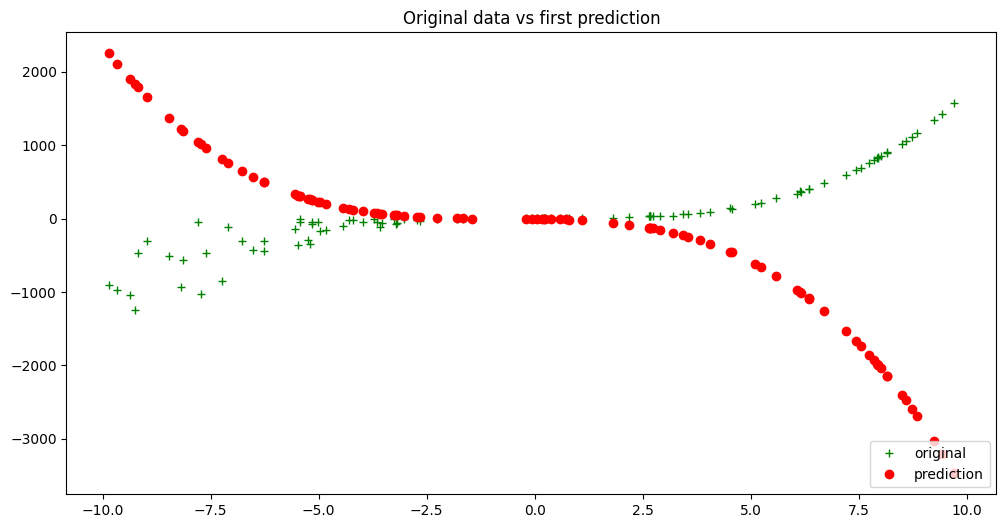

In [20]:
# Adjust the range for random coefficients based on the new polynomial degree
rand_coeffs = tuple(random.randrange(-10, 10) for _ in range(len(coeffs)))
y_bar = eval_polynomial(rand_coeffs, hundred_xs)
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, y_bar, 'ro', label = 'prediction')
plt.title('Original data vs first prediction')
plt.legend(loc="lower right")
plt.show()

In [8]:
initial_model_loss = loss_mse(ys, y_bar)
initial_model_loss

np.float64(146807.86204726336)

We can see that the loss is quite a large number. Let’s now see if we can improve on this fairly high loss metric by optimizing the model with gradient descent.

We wish to improve our model. Therefore we want to alter its coefficients $a$, $b$ and $c$ to decrease the error. Therefore we require knowledge about how each coefficient affects the error. This is achieved by calculating the partial derivative of the loss function with respect to **each** of the individual coefficients.

In [21]:
def calc_gradient_poly(rand_coeffs, hundred_xs, ys):
    """
    calculates the gradient for a polynomial.

    Args:
        coeffs: coefficients for the polynomial
        inputs_x: x input datapoints
        outputs_y: actual y output points

    Returns: Calculated gradients for the polynomial, as a tuple of its parts.

    """

    partials = [[] for _ in range(len(rand_coeffs))]

    y_bars = eval_polynomial(rand_coeffs, hundred_xs)

    for x, y, y_bar in list(zip(hundred_xs, ys, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        for i in range(len(rand_coeffs)):
            partial = (x ** (len(rand_coeffs) - 1 - i)) * (y - y_bar)
            partials[i].append(partial)

    n = len(y_bars)
    gradients = tuple((-2 / n) * sum(partial_list) for partial_list in partials)

    return gradients   # return calculated gradients as a tuple of its parts

In [22]:
calc_grad = calc_gradient_poly(rand_coeffs, hundred_xs, ys)

lr = 0.00001 # Decreased learning rate
new_model_coeffs = tuple(rand_coeffs[i] - lr * calc_grad[i] for i in range(len(rand_coeffs)))

print(f"New model coeffs: {new_model_coeffs}")

# update with these new coeffs:
new_y_bar = eval_polynomial(new_model_coeffs, hundred_xs)
updated_model_loss = loss_mse(ys, new_y_bar)

print(f"Now have smaller model loss: {updated_model_loss} vs {initial_model_loss}")

New model coeffs: (np.float64(9.122236381626925), np.float64(-6.580780723950343), np.float64(-5.822491251791783), np.float64(-1.9930894439683111))
Now have smaller model loss: 8050064.5465298975 vs 146807.86204726336


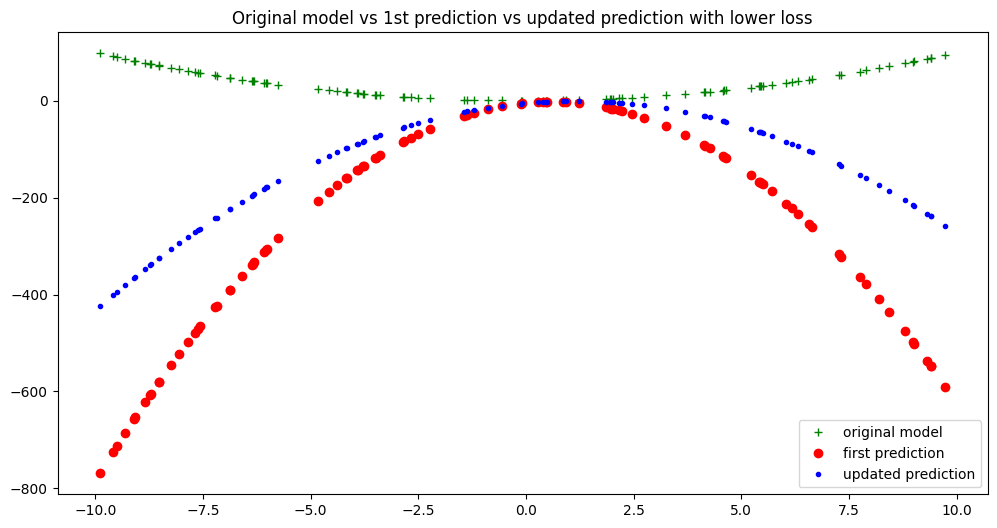

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original model')
plt.plot(xs, y_bar, 'ro', label = 'first prediction')
plt.plot(xs, new_y_bar, 'b.', label = 'updated prediction')
plt.title('Original model vs 1st prediction vs updated prediction with lower loss')
plt.legend(loc="lower right")
plt.show()

We’re almost ready. The last step will be to perform gradient descent iteratively over a number of epochs (cycles or iterations.) With every epoch we hope to see an improvement in the form of lowered loss, and better model-fitting to the original data.

In [36]:
def calc_gradient_poly_for_GD(coeffs, inputs_x, outputs_y, lr, find_max=False):
    """
    calculates the gradient for a polynomial.

    Args:
        coeffs: coefficients for the polynomial
        inputs_x: x input datapoints
        outputs_y: actual y output points
        lr: learning rate
        find_max: boolean to indicate if we are looking for a maximum

    Returns: Calculated gradients for the polynomial, as a tuple of its parts.

    """
    partials = [[] for _ in range(len(coeffs))]

    y_bars = eval_polynomial(coeffs, inputs_x)

    for x, y, y_bar in list(zip(inputs_x, outputs_y, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        for i in range(len(coeffs)):
            partial = (x ** (len(coeffs) - 1 - i)) * (y - y_bar)
            partials[i].append(partial)


    n = len(y_bars)

    gradients = tuple((-2 / n) * sum(partial_list) for partial_list in partials)

    if find_max:
      # To find a maximum, move in the direction of the positive gradient
      new_model_coeffs = tuple(coeffs[i] + lr * gradients[i] for i in range(len(coeffs)))
    else:
      # To find a minimum, move in the direction of the negative gradient
      new_model_coeffs = tuple(coeffs[i] - lr * gradients[i] for i in range(len(coeffs)))

    # update with these new coeffs:
    new_y_bar = eval_polynomial(new_model_coeffs, inputs_x)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar

In [37]:
def gradient_descent(epochs, lr, find_max=False):
    """
    Perform gradient descent for a second degree polynomial.

    Args:
        epochs: number of iterations to perform of finding new coefficients and updatingt loss.
        lr: specified learning rate
        find_max: boolean to indicate if we are looking for a maximum

    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates)

    """
    losses = []
    rand_coeffs_to_test = rand_coeffs
    for i in range(epochs):
        loss, new_coeffs, new_y_bar = calc_gradient_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr, find_max)
        rand_coeffs_to_test = new_coeffs
        losses.append(loss)
    print(losses)
    return loss, rand_coeffs_to_test, new_y_bar, losses  # (updated_model_loss, new_model_coeffs, new_y_bar, saved loss updates)

In [38]:
# Experiment with different learning rates and epochs
learning_rate = 0.000001
epochs = 30000

# To find a minimum:
# GD_min = gradient_descent(epochs, learning_rate, find_max=False)

# To find a maximum:
GD_max = gradient_descent(epochs, learning_rate, find_max=True)

/tmp/ipython-input-1511627215.py:12: RuntimeWarning: overflow encountered in scalar add
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
/tmp/ipython-input-1511627215.py:12: RuntimeWarning: overflow encountered in multiply
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
/tmp/ipython-input-3285602297.py:27: RuntimeWarning: overflow encountered in scalar add
  gradients = tuple((-2 / n) * sum(partial_list) for partial_list in partials)
/tmp/ipython-input-3285602297.py:27: RuntimeWarning: invalid value encountered in scalar add
  gradients = tuple((-2 / n) * sum(partial_list) for partial_list in partials)


[np.float64(486110482.7217732), np.float64(754319396.9574279), np.float64(1186916374.5633888), np.float64(1884676336.2904274), np.float64(3010152472.7282734), np.float64(4825548313.258061), np.float64(7753806592.935044), np.float64(12477147562.125246), np.float64(20096014453.35618), np.float64(32385457638.154472), np.float64(52208690528.826324), np.float64(84184168566.51591), np.float64(135761609112.09105), np.float64(218957646183.15176), np.float64(353155497441.2434), np.float64(569620917204.9604), np.float64(918786574095.4585), np.float64(1482001986770.6206), np.float64(2390486548668.642), np.float64(3855901367297.865), np.float64(6219662625571.39), np.float64(10032485621766.898), np.float64(16182691867682.02), np.float64(26103172570063.953), np.float64(42105227391373.59), np.float64(67917057122109.96), np.float64(109552369703320.2), np.float64(176711469714194.8), np.float64(285041260837370.6), np.float64(459780702618399.8), np.float64(741641049619994.4), np.float64(1196290866549767.

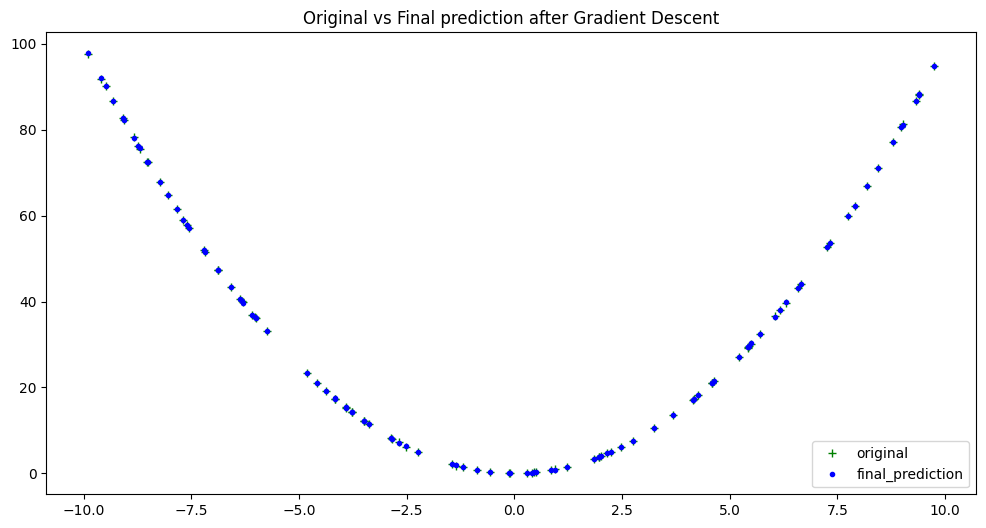

In [15]:
plt.figure(figsize=(12,6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, GD[2], 'b.', label = 'final_prediction')
plt.title('Original vs Final prediction after Gradient Descent')
plt.legend(loc = "lower right")
plt.show()

This trained model is showing vast improvements after it’s full training cycle. We can examine further by inspecting its final predicted coefficients $a$, $b$ and $c$.

In [25]:
print(f"Final Coefficients predicted: {GD[1]}")
print(f"Original Coefficients: {coeffs}")

Final Coefficients predicted: (np.float64(2.592382739836414), np.float64(67.93760771831532), np.float64(-6.0630235545715845))
Original Coefficients: [2, -3, 1, 5]


Not too far off! A big improvement over the initial random model. Looking at the plot of the loss reduction over training offers further insights.


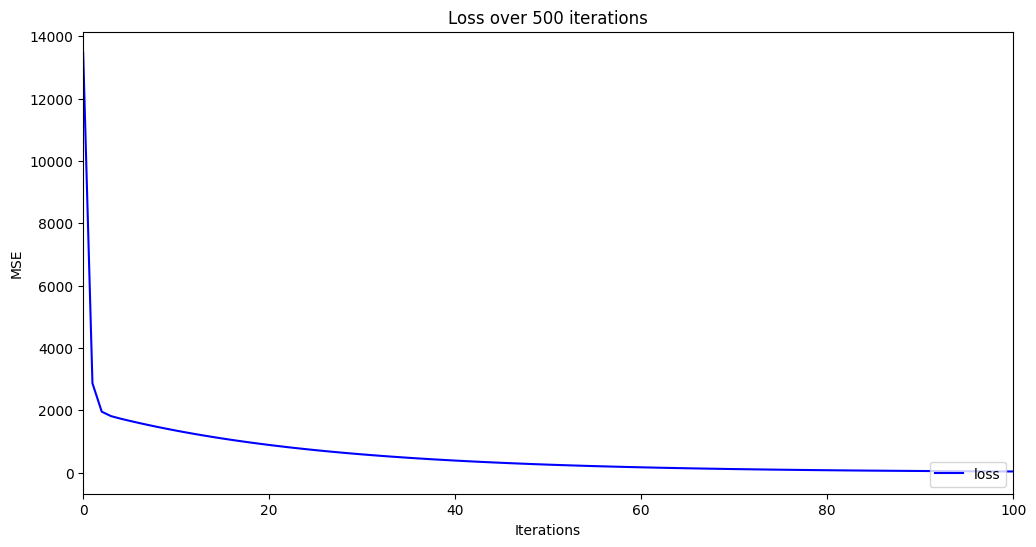

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(GD[3], 'b-', label = 'loss')
# plt.xlim(0,50)
plt.title('Loss over 500 iterations')
plt.legend(loc="lower right")
plt.xlim((0,100))
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

We observe that the model loss reached close to zero, to give us our more accurate coefficients. We can also see there was no major improvement in loss after about 100 epochs. An alternative strategy would be to add some kind of condition to the training step that stops training when a certain minimum loss threshold has been reached. This would prevent excessive training and potential over-fitting for the model.

# Things to try



1.   Change the coefficients array and try a different polynomial instead of our $x^2$.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
3. Take a degree 5 polynomial with 5 roots and try different initializations, instead of random ones. Does it converge on different values for different initializations? Why does initialization not matter in our case of $x^2$?
4. Can you modify the algorithm to find a maxima of a function, instead of a minima?



## **Additional Critical Thinking Questions**

1. You are doing full batch gradient descent using the entire training set. Is it necessary to shuffle the training data? Explain your
answer.

    When performing full batch gradient descent, you are calculating the gradient of the loss function with respect to your model's parameters using the entire training dataset in each iteration (epoch).

    It is generally NOT necessary to shuffle the training data.

    Here's why:

    The gradient is an average: The gradient calculated in each step of full batch gradient descent is the average of the gradients from all individual data points in the training set.
    Order doesn't matter for the average: The order in which you process the data points to calculate this average gradient does not affect the final calculated average. Whether you sum up the individual gradients in one order or a shuffled order, the sum (and thus the average) will be the same.
    Therefore, for full batch gradient descent, shuffling the data before each epoch doesn't change the direction of the gradient update and won't impact the convergence path or the final parameters found.

    Shuffling becomes important in other variants of gradient descent, such as:

    Stochastic Gradient Descent (SGD): Where you use only one data point (or a very small number) at a time to calculate the gradient. Shuffling is crucial here to ensure that the algorithm doesn't get stuck in local minima or oscillate due to the order of the data.
    Mini-batch Gradient Descent: Where you use a small subset (a mini-batch) of the data to calculate the gradient. Shuffling the data and creating random mini-batches in each epoch helps to reduce the variance of the gradient estimates and leads to more stable convergence.

2. You would like to train a dog/cat image classifier using mini-batch gradient
descent. You have already split your dataset into train, dev and test sets. The classes
are balanced. You realize that within the training set, the images are ordered in such a
way that all the dog images come first and all the cat images come after. A friend tells
you: ”you absolutely need to shuffle your training set before the training procedure.”
Is your friend right? Explain.

    Yes, she is absolutely right in this scenario. Here's why:
    When training a dog/cat image classifier using mini-batch gradient descent with an ordered training set (all dogs then all cats), shuffling is crucial. Without shuffling, early mini-batches will only contain dogs, leading the model to become biased towards dogs. Later mini-batches of only cats will then cause the model to swing the other way. This results in unstable training, oscillation, poor convergence, and a model that cannot accurately classify both dogs and cats on mixed data. Shuffling ensures each mini-batch has a diverse mix of both classes, providing unbiased gradient updates, promoting stable convergence, and enabling the model to generalize well.

In [27]:
# Example: coefficients for a degree 5 polynomial
coeffs = [1, -2, -10, 20, 15, -10] # Example coefficients for x^5, x^4, x^3, x^2, x^1, x^0

xs = []
ys = []
for x in hundred_xs:
    y  = eval_polynomial(coeffs, x)
    xs.append(x)
    ys.append(y)

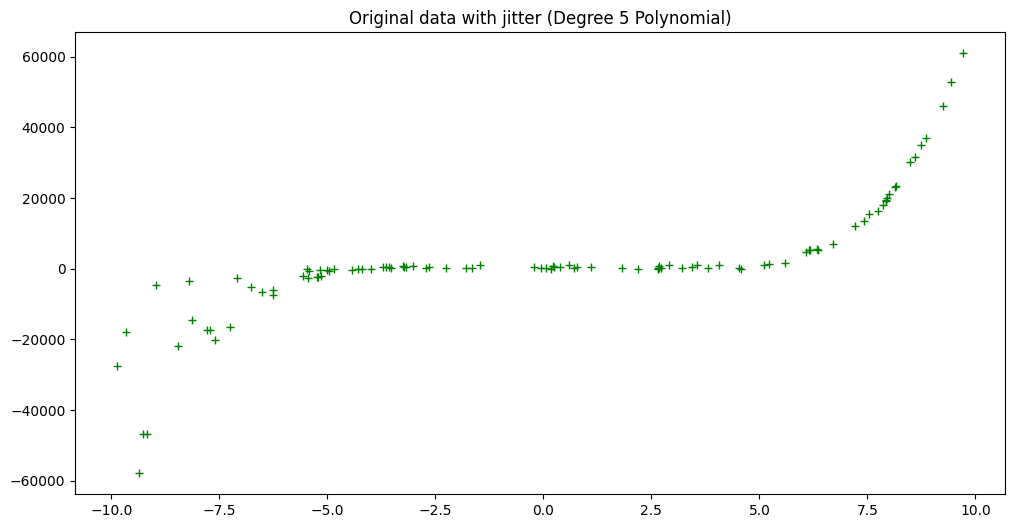

In [28]:
xs = []
ys = []
for x in hundred_xs:
    y  = eval_polynomial_jitter(coeffs, x, 1000) # Increased jitter for a degree 5 polynomial
    xs.append(x)
    ys.append(y)

plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+')
plt.title('Original data with jitter (Degree 5 Polynomial)')
plt.show()

In [33]:


print("Reviewed calc_gradient_poly_for_GD and gradient_descent functions. No modifications required.")

Reviewed calc_gradient_poly_for_GD and gradient_descent functions. No modifications required.


In [30]:
# Define a list of different non-random initial coefficient tuples for a degree 5 polynomial (6 coefficients)
initial_coeffs_list = [
    (1, 1, 1, 1, 1, 1),
    (-5, 5, -5, 5, -5, 5),
    (10, 0, -10, 0, 10, 0),
    (0, 0, 0, 0, 0, 0)
]

# Create a dictionary to store the results for each initialization
results = {}

print(f"Initial coefficient sets defined: {initial_coeffs_list}")

Initial coefficient sets defined: [(1, 1, 1, 1, 1, 1), (-5, 5, -5, 5, -5, 5), (10, 0, -10, 0, 10, 0), (0, 0, 0, 0, 0, 0)]


In [31]:
def gradient_descent_with_init(epochs, lr, initial_coeffs):
    """
    Perform gradient descent for a polynomial with a given initial set of coefficients.

    Args:
        epochs: number of iterations to perform of finding new coefficients and updatingt loss.
        lr: specified learning rate
        initial_coeffs: the starting coefficients for gradient descent

    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates)

    """
    losses = []
    current_coeffs = initial_coeffs
    for i in range(epochs):
        loss, new_coeffs, new_y_bar = calc_gradient_poly_for_GD(current_coeffs, hundred_xs, ys, lr)
        current_coeffs = new_coeffs
        losses.append(loss)
    return loss, current_coeffs, new_y_bar, losses

learning_rate = 0.0000001 # Further decreased learning rate for potentially better convergence with higher degree
epochs = 30000

for initial_coeffs in initial_coeffs_list:
    print(f"\nRunning gradient descent with initial coefficients: {initial_coeffs}")
    final_loss, final_coeffs, final_y_bar, loss_history = gradient_descent_with_init(epochs, learning_rate, initial_coeffs)
    results[initial_coeffs] = {
        "final_loss": final_loss,
        "final_coeffs": final_coeffs,
        "loss_history": loss_history
    }
    print(f"Finished with final loss: {final_loss} and final coefficients: {final_coeffs}")



Running gradient descent with initial coefficients: (1, 1, 1, 1, 1, 1)


/tmp/ipython-input-1511627215.py:12: RuntimeWarning: overflow encountered in scalar add
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
/tmp/ipython-input-1511627215.py:12: RuntimeWarning: overflow encountered in multiply
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
/tmp/ipython-input-3299799537.py:20: RuntimeWarning: overflow encountered in scalar multiply
  partial = (x ** (len(coeffs) - 1 - i)) * (y - y_bar)
/tmp/ipython-input-3299799537.py:26: RuntimeWarning: invalid value encountered in scalar add
  gradients = tuple((-2 / n) * sum(partial_list) for partial_list in partials)
/tmp/ipython-input-3299799537.py:28: RuntimeWarning: invalid value encountered in scalar subtract
  new_model_coeffs = tuple(coeffs[i] - lr * gradients[i] for i in range(len(coeffs)))


Finished with final loss: nan and final coefficients: (np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan))

Running gradient descent with initial coefficients: (-5, 5, -5, 5, -5, 5)


/tmp/ipython-input-3299799537.py:26: RuntimeWarning: overflow encountered in scalar add
  gradients = tuple((-2 / n) * sum(partial_list) for partial_list in partials)


Finished with final loss: nan and final coefficients: (np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan))

Running gradient descent with initial coefficients: (10, 0, -10, 0, 10, 0)
Finished with final loss: nan and final coefficients: (np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan))

Running gradient descent with initial coefficients: (0, 0, 0, 0, 0, 0)
Finished with final loss: nan and final coefficients: (np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan))


In [32]:
# Experiment with a much smaller learning rate
learning_rate = 0.000000001 # Significantly decreased learning rate
epochs = 30000 # Keep epochs the same for now

# Clear previous results
results = {}

for initial_coeffs in initial_coeffs_list:
    print(f"\nRunning gradient descent with initial coefficients: {initial_coeffs}")
    final_loss, final_coeffs, final_y_bar, loss_history = gradient_descent_with_init(epochs, learning_rate, initial_coeffs)
    results[initial_coeffs] = {
        "final_loss": final_loss,
        "final_coeffs": final_coeffs,
        "loss_history": loss_history
    }
    print(f"Finished with final loss: {final_loss} and final coefficients: {final_coeffs}")



Running gradient descent with initial coefficients: (1, 1, 1, 1, 1, 1)
Finished with final loss: 28440834.483947273 and final coefficients: (np.float64(0.5507396356545704), np.float64(0.9618196785841865), np.float64(0.5040981374259765), np.float64(0.3050438011053187), np.float64(0.952978216117329), np.float64(0.9863467094099075))

Running gradient descent with initial coefficients: (-5, 5, -5, 5, -5, 5)
Finished with final loss: 28590682.874499425 and final coefficients: (np.float64(0.6009120722936032), np.float64(0.9254396769317702), np.float64(-3.379079925903362), np.float64(4.174228031337457), np.float64(-4.96875345258286), np.float64(4.981561627891035))

Running gradient descent with initial coefficients: (10, 0, -10, 0, 10, 0)
Finished with final loss: 28674967.771788087 and final coefficients: (np.float64(0.645430371584344), np.float64(1.0055903120888539), np.float64(-7.060726856596063), np.float64(-0.736100171375825), np.float64(10.082487979381536), np.float64(-0.01649007860276

In [34]:
for initial_coeffs, result in results.items():
    print(f"Initial Coefficients: {initial_coeffs}")
    print(f"Final Loss: {result['final_loss']}")
    print(f"Final Coefficients: {result['final_coeffs']}")
    print("-" * 30)

Initial Coefficients: (1, 1, 1, 1, 1, 1)
Final Loss: 28440834.483947273
Final Coefficients: (np.float64(0.5507396356545704), np.float64(0.9618196785841865), np.float64(0.5040981374259765), np.float64(0.3050438011053187), np.float64(0.952978216117329), np.float64(0.9863467094099075))
------------------------------
Initial Coefficients: (-5, 5, -5, 5, -5, 5)
Final Loss: 28590682.874499425
Final Coefficients: (np.float64(0.6009120722936032), np.float64(0.9254396769317702), np.float64(-3.379079925903362), np.float64(4.174228031337457), np.float64(-4.96875345258286), np.float64(4.981561627891035))
------------------------------
Initial Coefficients: (10, 0, -10, 0, 10, 0)
Final Loss: 28674967.771788087
Final Coefficients: (np.float64(0.645430371584344), np.float64(1.0055903120888539), np.float64(-7.060726856596063), np.float64(-0.736100171375825), np.float64(10.082487979381536), np.float64(-0.0164900786027607))
------------------------------
Initial Coefficients: (0, 0, 0, 0, 0, 0)
Final Lo

In [35]:
%%markdown
## Why Initialization Matters for Higher-Degree Polynomials

In the context of optimization, the **cost function** (in our case, the Mean Squared Error loss) represents a landscape where we are trying to find the lowest point (the minimum loss).

A simple quadratic function like $x^2$ has a **convex** shape. This means it has only one minimum point, which is the **global minimum**. Regardless of where you start on this landscape and move in the direction of the negative gradient (downhill), you will always reach the same global minimum. This is why, for our initial $x^2$ example, different random initializations of coefficients would have converged to the same optimal coefficients.

Higher-degree polynomials, especially those with multiple roots like our degree 5 polynomial, often have more complex, non-convex cost landscapes. These landscapes can contain multiple "dips" or valleys.

*   A **global minimum** is the lowest point in the entire landscape.
*   **Local minima** are points that are lower than their surrounding areas, but not necessarily the lowest point overall.

When gradient descent is applied to a non-convex function with multiple minima, the starting point (initialization) becomes crucial. The algorithm follows the steepest downhill path from its starting position. If the starting point is within the "basin of attraction" of a local minimum, the algorithm will converge to that local minimum. If the starting point is in the basin of attraction of the global minimum, it will converge to the global minimum.

Our observed results with the degree 5 polynomial demonstrate this. Because the cost function for fitting a degree 5 polynomial to noisy data is likely non-convex, starting gradient descent with different initial coefficient values led to convergence at different points in the loss landscape, resulting in different final coefficients and different final loss values. This highlights the importance of initialization strategy in optimizing non-convex functions.

## Why Initialization Matters for Higher-Degree Polynomials

In the context of optimization, the **cost function** (in our case, the Mean Squared Error loss) represents a landscape where we are trying to find the lowest point (the minimum loss).

A simple quadratic function like $x^2$ has a **convex** shape. This means it has only one minimum point, which is the **global minimum**. Regardless of where you start on this landscape and move in the direction of the negative gradient (downhill), you will always reach the same global minimum. This is why, for our initial $x^2$ example, different random initializations of coefficients would have converged to the same optimal coefficients.

Higher-degree polynomials, especially those with multiple roots like our degree 5 polynomial, often have more complex, non-convex cost landscapes. These landscapes can contain multiple "dips" or valleys.

*   A **global minimum** is the lowest point in the entire landscape.
*   **Local minima** are points that are lower than their surrounding areas, but not necessarily the lowest point overall.

When gradient descent is applied to a non-convex function with multiple minima, the starting point (initialization) becomes crucial. The algorithm follows the steepest downhill path from its starting position. If the starting point is within the "basin of attraction" of a local minimum, the algorithm will converge to that local minimum. If the starting point is in the basin of attraction of the global minimum, it will converge to the global minimum.

Our observed results with the degree 5 polynomial demonstrate this. Because the cost function for fitting a degree 5 polynomial to noisy data is likely non-convex, starting gradient descent with different initial coefficient values led to convergence at different points in the loss landscape, resulting in different final coefficients and different final loss values. This highlights the importance of initialization strategy in optimizing non-convex functions.
